## DA_Fall21_HW_1 Due at Mid-night 10/19/2021

### This homework will cover the following skills set
* Using sql 
* Checking for null values and outliers
* Calculate simple statistics using both SQL and Pandas 
* Calculate skew and correlation
* Basic Data Visualization
* How to fix missing values

## Late Policy: Take off 50% after one day, 80% after two days

**Make sure you have pandasql installed. If not, make sure you run the code in the following cell**

In [2]:
import os
try:
    import pandasql as ps
except:
    print("Failed in import pandasql")
    os.system("pip install pandasql")

**Import all standard libaries**

In [3]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Car Crashes dataset ##

In [4]:
crash = pd.read_csv("car_crashes2.csv")
print(crash.shape)
crash.head()

(54, 10)


,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,South,East South Central
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,West,Pacific
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,West,Mountain
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,South,West South Central
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,West,Pacific


* accidents is the total number of crashes for each state
* speeding is the average speeding in each state

In [5]:
crash.describe()

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,54.000000,53.000000,54.000000,54.000000,54.000000,53.000000,54.000000
mean,15.668519,5.028755,5.506778,13.545407,13.931500,908.318113,133.967407
std,4.087386,2.000479,5.157681,4.463259,3.730217,232.237787,24.703393
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.725000,3.774000,3.891000,10.345000,11.262000,768.950000,112.332500
50%,15.450000,4.608000,4.542000,13.816000,13.717000,861.180000,135.840000
75%,18.350000,6.510000,5.622000,16.215000,16.579000,1011.140000,152.065000
max,23.900000,9.450000,40.642000,23.661000,21.280000,2000.030000,194.780000


## Question 1. Check if there are any null or NA

In [6]:
print(crash.isnull().sum())

accidents         0
speeding          1
alcohol           0
not_distracted    0
no_previous       0
ins_premium       1
ins_losses        0
state             0
region            0
division          0
dtype: int64


## Question 2. Remove any rows that has null or NA

In [7]:
crash = crash.dropna()
print(crash.isnull().sum())

accidents         0
speeding          0
alcohol           0
not_distracted    0
no_previous       0
ins_premium       0
ins_losses        0
state             0
region            0
division          0
dtype: int64


## Question 3. Check if there is any outliers in all numerical fields using both scatter and boxplot

**Type in your code here**

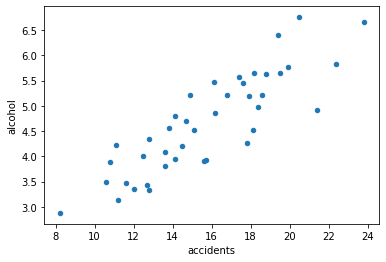

In [145]:
crash.plot(kind='scatter',y='alcohol', x='accidents')
#crash.plot(kind='scatter',y='speeding', x='accidents')
#crash.plot(kind='scatter',y='not_distracted', x='accidents')
#crash.plot(kind='scatter',y='no_previous', x='accidents')
#crash.plot(kind='scatter',y='ins_premium', x='accidents')
#crash.plot(kind='scatter',y='ins_losses', x='accidents')

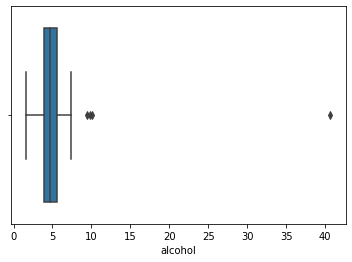

In [11]:
#sns.boxplot(x=crash['speeding'])
sns.boxplot(x=crash['alcohol']) #there is outlier
#sns.boxplot(x=crash['not_distracted'])
#sns.boxplot(x=crash['no_previous'])
#sns.boxplot(x=crash['ins_premium']) #there is outlier
#sns.boxplot(x=crash['ins_losses'])

## Question 4. Display and Remove (the real) outliers

## 1) For alcohol field

In [18]:
q_lowest = crash["alcohol"].quantile(0.05)
q_highest = crash["alcohol"].quantile(0.90)

In [19]:
crash_filtered = crash[(crash["alcohol"]<q_highest) & (crash["alcohol"]>q_lowest)]

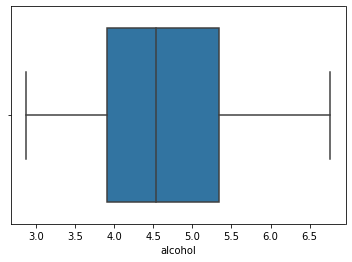

In [20]:
#result
sns.boxplot(x=crash_filtered['alcohol'])

In [21]:
q_lowest = crash["ins_premium"].quantile(0.01)
q_highest = crash["ins_premium"].quantile(0.99)
crash_filtered = crash_filtered[(crash_filtered["ins_premium"]<q_highest) & (crash_filtered["ins_premium"]>q_lowest)]

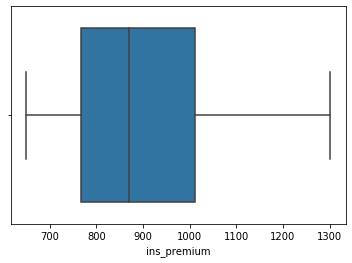

In [22]:
#result
sns.boxplot(x=crash_filtered['ins_premium'])

In [23]:
#assign to the original
crash = crash_filtered

## Question 5. Calculate the average speeding in usa and Northeast region using SQL

In [24]:
sql = lambda q: ps.sqldf(q,globals())

In [34]:
sql("SELECT region, AVG(speeding) FROM crash where region = 'Northeast'")

,region,AVG(speeding)
0,Northeast,4.42475


## Question 6. Calculate the average alcohol for each region using SQL

**Type in your code here**

In [33]:
sql("SELECT region, AVG(alcohol) FROM crash group by region")

,region,AVG(alcohol)
0,Midwest,4.714100
1,Northeast,3.980500
2,South,5.234643
3,West,4.329667


## Question 7. Calculate the number of occurrences, mean, min, max of the speeding for each divison using SQL

In [38]:
sql("SELECT division, COUNT(division), AVG(speeding), MIN(speeding), MAX(speeding) FROM crash group by division")

,division,COUNT(division),AVG(speeding),MIN(speeding),MAX(speeding)
0,East North Central,5,4.106600,3.384,4.968
1,East South Central,4,4.533250,2.640,7.332
2,Middle Atlantic,2,5.446000,1.792,9.100
3,Mountain,5,5.557000,3.496,7.308
4,New England,6,4.084333,1.886,5.738
5,Pacific,4,5.074250,4.200,7.421
6,South Atlantic,7,4.883714,2.413,8.092
7,West North Central,5,4.469800,1.937,6.923
8,West South Central,3,5.858333,4.032,7.175


## Question 8. Answer Question 7 but use Pandas functions

In [81]:
crash[['speeding','division']].groupby('division').agg(['count','mean','min','max'])    

speeding                        
                      count      mean    min    max
division                                           
East North Central        5  4.106600  3.384  4.968
East South Central        4  4.533250  2.640  7.332
Middle Atlantic           2  5.446000  1.792  9.100
Mountain                  5  5.557000  3.496  7.308
New England               6  4.084333  1.886  5.738
Pacific                   4  5.074250  4.200  7.421
South Atlantic            7  4.883714  2.413  8.092
West North Central        5  4.469800  1.937  6.923
West South Central        3  5.858333  4.032  7.175

## Question 9. Calculate the Standard deviation, Skew and Kurtosis for the accidents, speeding, alcohol for each region

**Type in your code here**

In [93]:
#Skew
crash[['accidents','speeding','alcohol','region']].groupby('region').skew()

,accidents,speeding,alcohol
region,,,
Midwest,1.038854,0.230159,1.208719
Northeast,0.777587,1.051666,0.764250
South,-0.247488,0.235427,-0.316669
West,-0.145859,0.451006,0.068405


In [96]:
#Standard deviation
crash[['accidents','speeding','alcohol','region']].groupby('region').std()

,accidents,speeding,alcohol
region,,,
Midwest,2.001000,1.500969,0.782071
Northeast,3.077453,2.327773,0.872950
South,3.343585,1.890938,0.969408
West,3.061454,1.432264,0.851329


In [100]:
#Kurtosis
crash[['accidents','speeding','alcohol','region']].groupby('region').apply(pd.DataFrame.kurt)

,accidents,speeding,alcohol
region,,,
Midwest,0.641949,-0.225414,1.126557
Northeast,0.726713,1.763520,0.890501
South,-0.417919,-1.419641,-0.227123
West,-1.778022,-1.326451,-1.727504


## Question 10. Plot the histogram of accidents distribution for different region using 5 bins

           accidents
region              
Midwest        153.2
Northeast       99.8
South          255.6
West           136.2


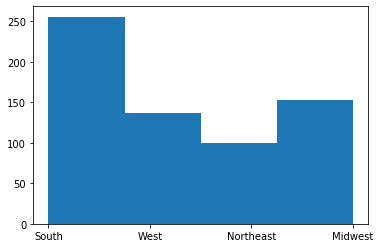

In [122]:
print(crash[['accidents', 'region']].groupby('region').agg('sum'))
plt.hist(crash['region'], weights=crash['accidents'], bins=4)
plt.show()

**Type in your answer here**

## Question 11. How would you describe the accidents distribution for different region based on the Skew and Kurotsis?
(i.e. who has positive and negative skew and who has positive and negative Kurotsis)

The region of Midwest and Northeast have positive Kurotsis, otherwise, South and West regions have negative Kurotosis.

The region of Midwest and Northeast have positive Skew, otherwise, South and West regions have negative Skew.


In [144]:
#crash[['accidents','region']].groupby('region').apply(pd.DataFrame.kurt)
crash[['accidents','region']].groupby('region').skew()

,accidents
region,
Midwest,1.038854
Northeast,0.777587
South,-0.247488
West,-0.145859


## Question 12. Calculate correlation of all the factors among themselves and determine which factors among speeding, alcohol or ins_premium will affect accidents the most?

Answer --> Alcohol mo stly affects accidents 

In [130]:
crash.corr(method='pearson')
#crash['accidents'].corr(crash['speeding'])
#crash['accidents'].corr(crash['alcohol'])
#crash['accidents'].corr(crash['ins_premium'])

#Answer --> Alcohol mostly affects accidents 

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
accidents,1.000000,0.510201,0.860698,0.745511,0.946022,-0.065860,0.094045
speeding,0.510201,1.000000,0.611283,0.515812,0.479895,0.012709,0.091946
alcohol,0.860698,0.611283,1.000000,0.636439,0.829713,-0.037727,0.138967
not_distracted,0.745511,0.515812,0.636439,1.000000,0.650023,-0.070343,0.023349
no_previous,0.946022,0.479895,0.829713,0.650023,1.000000,0.005896,0.130330
ins_premium,-0.065860,0.012709,-0.037727,-0.070343,0.005896,1.000000,0.645062
ins_losses,0.094045,0.091946,0.138967,0.023349,0.130330,0.645062,1.000000


### Now Load a different dataset (MPG dataset number 3)

In [137]:
mpg = pd.read_csv("mpg3.csv")
print(mpg.shape)
mpg.head()

(405, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,usa,ford torino


# Question 13: Check to see if there are any missing values. Fix the missing values by imputing value from the mean.

### Type your code to fix the missing values by imputing value from the mean

In [138]:
print(mpg.isnull().sum()) #check the missing value

mpg             1
cylinders       0
displacement    0
horsepower      6
weight          1
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


In [141]:
mpg['mpg'].fillna(mpg['mpg'].mean(), inplace = True)
mpg['horsepower'].fillna(mpg['horsepower'].mean(), inplace = True)
mpg['weight'].fillna(mpg['weight'].mean(), inplace = True)

In [142]:
print(mpg.isnull().sum()) #check the missing value

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64
